In [156]:
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
# Display preferences.
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [157]:
# Load data
crime_ny = pd.read_excel('/Users/justinsmith/Documents/GitHub/NY2013crime.xls', header=4, skipfooter=3)

In [158]:
# Find outliers and nan
crime_ny[crime_ny['Population'] > 1000000]
crime_ny = crime_ny.drop(crime_ny.columns[4], axis=1)
crime_ny = crime_ny.drop([0,216])
crime_ny.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan


In [159]:
# create features for linear regression
crime_ny['pop_sq'] =crime_ny['Population']**2
crime_ny['murder_bool'] = crime_ny['Murder and\nnonnegligent\nmanslaughter'].astype(bool)
crime_ny['rob_bool'] = crime_ny['Robbery'].astype(bool)
crime_ny['burg_bool'] = crime_ny['Burglary'].astype(bool)
crime_ny['arson_bool'] = crime_ny['Arson3'].astype(bool)

In [172]:
# start shaping data for regression
regr = linear_model.LinearRegression()
Y = crime_ny['Property\ncrime'].values.reshape(-1,1)
X = crime_ny[['Population','pop_sq','murder_bool', 'rob_bool', 'burg_bool', 'arson_bool']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
# look at data
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.26881989e-02  1.15811646e-07  1.86840684e+02  7.84200907e+01
  -2.61529772e+01  6.41717497e+01]]

Intercept: 
 [-18.83398444]

R-squared:
0.84515842558673


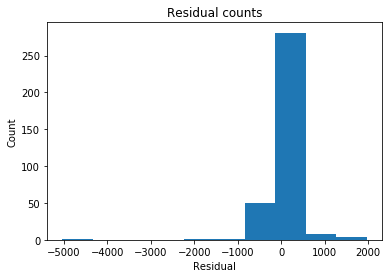

In [162]:
# plot the residual in a histogram
predicted = regr.predict(X).ravel()
actual = crime_ny['Property\ncrime']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

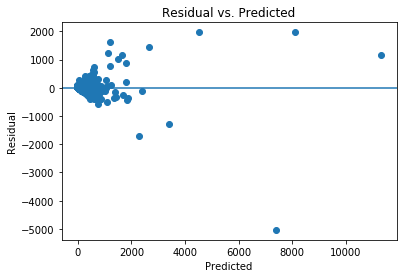

In [163]:
# plot prediction with residual
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [144]:
# Not very imformative.
# Check out the correlation matrix
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,pop_sq,murder_bool,rob_bool,burg_bool,arson_bool
Population,1.000,0.889,0.502,0.343,0.135,0.250
pop_sq,0.889,1.000,0.345,0.152,0.049,0.134
murder_bool,0.502,0.345,1.000,0.310,0.102,0.246
rob_bool,0.343,0.152,0.310,1.000,0.287,0.369
burg_bool,0.135,0.049,0.102,0.287,1.000,0.299
arson_bool,0.250,0.134,0.246,0.369,0.299,1.000


/Users/justinsmith/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


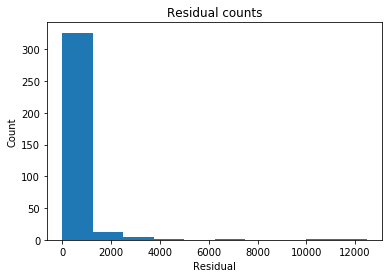

In [145]:
# scale the data to find a better fit
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalerX = StandardScaler().fit(X)
scalerY = StandardScaler().fit(Y) # Have to reshape to avoid warnings

normed_X = scalerX.transform(X)
normed_y = scalerY.transform(Y) # Have to reshape to avoid warnings

normed_y = normed_y.ravel()
# Calculate the error, also called the residual.
lr = linear_model.LinearRegression()
lr.fit(normed_X,normed_y)
predicted_2 = lr.predict(normed_X).ravel()
actual_2 = crime_ny['Property\ncrime']
residual_2 = actual_2 - predicted_2

# This looks a bit concerning.
plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

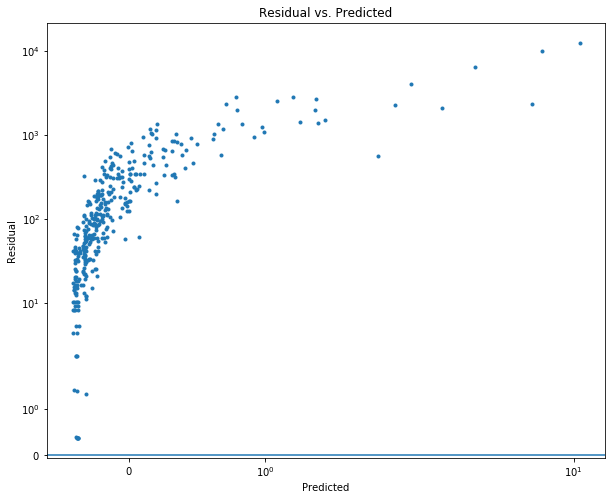

In [179]:
fig = plt.figure(111,figsize=[10,8])
ax = plt.gca()
ax.scatter(predicted_2, residual_2, marker='.')
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residual')
ax.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [180]:
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(normed_X, normed_y))


Coefficients: 
 [ 0.33211479  0.56742186  0.06244976  0.03713036 -0.00603814  0.03014174]

Intercept: 
 1.9805934333098026e-17

R-squared:
0.8451584255867298
